In [1]:
# Reading Pupil Data
import pandas as pd
import numpy as np
def pupil_preparation(batch, animall):
    df = pd.read_csv("Batch" + str(batch) + "/" + "animal_" + str(batch) + str(animall) + "_pupilDLC_resnet50_Pupil_NetworkJun15shuffle1_1030000.csv")
    for col in [3,6,9,12,15,18,21,24,27]:
        for ind in df.index:
            if(df.iat[ind,col]<0.95):
                df.iat[ind,col-1] = np.nan
                df.iat[ind,col-2] = np.nan
    df = df.drop(columns = ["pupilNorth.p","pupilEast.p","pupilSouth.p","pupilWest.p","pupilCenter.p","eyeNorth.p","eyeEast.p","eyeSouth.p","eyeWest.p"])
    # preparing similarity index (reordered like the neural activity) 10 shock, 10 shock CTRL...10 laserCTRL (no squeaks)
    sec = 5
    fps = 15.49/3
    frames_interval = int(sec * fps)
    total_frames = 2 * frames_interval + 1
    #frames interval is 25, total frames is 51

    temp = pd.DataFrame.copy(df, deep = True)
    
    #stimulus times are from behavioral data, but facial expressions have 3 x fps of pupil for batch 2
    list_start = pd.read_csv("Batch" + str(batch) + "/" +'list_start'+ str(batch) + str(animall) + ".csv", index_col = 0)
    if(str(batch) == "2"):
        list_start = list_start.dropna(axis = 1)
        list_start = list_start/3
        list_start = list_start.astype(int)
    
    if(str(animall) != "4"):
        time = pd.concat([list_start["shock"],list_start["shockCTRL"],list_start["laserHI"],list_start["laserLO"],list_start["laserCTRL"], list_start["squeak"], list_start["squeakCTRL"]], axis = 0)
        times = pd.DataFrame(columns = ["value","index","stimulus"])
        times["value"] = pd.Series(time)
        times = times.reset_index(drop = True)
        for ind in range(0,10):
            times.at[ind,"index"]=ind
            times.at[ind,"stimulus"]="shock"
        for ind in range(10,20):
            times.at[ind,"index"]=ind-10
            times.at[ind,"stimulus"]="shockCTRL"
        for ind in range(20,30):
            times.at[ind,"index"]=ind-20
            times.at[ind,"stimulus"]= "laserHI"
        for ind in range(30,40):
            times.at[ind,"index"]=ind-30
            times.at[ind,"stimulus"]= "laserLO"
        for ind in range(40,50):
            times.at[ind,"index"]=ind-40
            times.at[ind,"stimulus"]= "laserCTRL"
        for ind in range(50,60):
            times.at[ind,"index"]=ind-50
            times.at[ind,"stimulus"]= "squeak"
        for ind in range(60,70):
            times.at[ind,"index"]=ind-60
            times.at[ind,"stimulus"]= "squeakCTRL"
        times = times.sort_values(by="value", ignore_index = True)
    else:
        time = pd.concat([list_start["shock"],list_start["shockCTRL"]], axis = 0)
        times = pd.DataFrame(columns = ["value","index","stimulus"])
        times["value"] = pd.Series(time)
        times = times.reset_index(drop = True)
        for ind in range(0,10):
            times.at[ind,"index"]=ind
            times.at[ind,"stimulus"]="shock"
        for ind in range(10,20):
            times.at[ind,"index"]=ind-10
            times.at[ind,"stimulus"]="shockCTRL"
        times = times.sort_values(by="value", ignore_index = True)
        
    
    
    keeping = []
    for val in times['value']:
        for add in range(-frames_interval,frames_interval+1):
            keeping.append(val+add)
    dropping = list(set(temp.index).difference(keeping))
    temp = temp.drop(temp.index[dropping], inplace = False)
    indices = pd.DataFrame(data = temp.index, columns = ['index'])
    temp = temp.reset_index(drop = True)
    temp['stimulus'] = pd.Series(dtype = str)
    z = 0
    for stim in times['stimulus']:
        for add in range(0,total_frames):
            temp.at[z,'stimulus'] = stim
            z = z + 1
 
    df_stimulus = pd.DataFrame.copy(temp, deep = True)
    df_stimulus = pd.concat([df_stimulus,indices], axis = 1)
    
    
    df_stimulus["pupilDiameter"] = pd.Series(float)
    for ind in df_stimulus.index:
        if(df_stimulus.at[ind,"pupilEast.x"]!= np.nan and df_stimulus.at[ind,"pupilCenter.x"] != np.nan):
            a = [df_stimulus.at[ind,"pupilEast.x"],df_stimulus.at[ind,"pupilEast.y"]]
            b = [df_stimulus.at[ind,"pupilCenter.y"],df_stimulus.at[ind,"pupilCenter.y"]]
            df_stimulus.at[ind,"pupilDiameter"] = 2 * np.linalg.norm(np.array(a)-np.array(b))
        if(str(df_stimulus.at[ind,"pupilNorth.x"])!= 'nan' and df_stimulus.at[ind,"pupilCenter.x"] != np.nan):
            a = [df_stimulus.at[ind,"pupilNorth.x"],df_stimulus.at[ind,"pupilNorth.y"]]
            b = [df_stimulus.at[ind,"pupilCenter.y"],df_stimulus.at[ind,"pupilCenter.y"]]
            df_stimulus.at[ind,"pupilDiameter"] = df_stimulus.at[ind,"pupilDiameter"]/2 + np.linalg.norm(np.array(a)-np.array(b))
    #print(df_stimulus.sort_values(by = 'pupilDiameter'))
    print(df_stimulus)
    #df_stimulus.to_csv("Batch" + str(batch) + "/" + "animal_" + str(batch) + str(animall) + "_pupilData_stimulus.csv")
    
    df["pupilDiameter"] = pd.Series(float)
    for ind in df.index:
        if(df.at[ind,"pupilEast.x"]!= np.nan and df.at[ind,"pupilCenter.x"] != np.nan):
            a = [df.at[ind,"pupilEast.x"],df.at[ind,"pupilEast.y"]]
            b = [df.at[ind,"pupilCenter.y"],df.at[ind,"pupilCenter.y"]]
            df.at[ind,"pupilDiameter"] = 2 * np.linalg.norm(np.array(a)-np.array(b))
        if(str(df.at[ind,"pupilNorth.x"])!= 'nan' and df.at[ind,"pupilCenter.x"] != np.nan):
            a = [df.at[ind,"pupilNorth.x"],df.at[ind,"pupilNorth.y"]]
            b = [df.at[ind,"pupilCenter.y"],df.at[ind,"pupilCenter.y"]]
            df.at[ind,"pupilDiameter"] = df.at[ind,"pupilDiameter"]/2 + np.linalg.norm(np.array(a)-np.array(b))
    #print(df.sort_values(by = 'pupilDiameter'))
    #df.to_csv("Batch" + str(batch) + "/" + "animal_" + str(batch) + str(animall) + "_pupilData.csv")
#pupil_preparation("1","1")
pupil_preparation("1","2")
#pupil_preparation("2","1")
#pupil_preparation("2","2")
#pupil_preparation("2","3")
#pupil_preparation("2","4")

      frame  pupilNorth.x  pupilNorth.y  pupilEast.x  pupilEast.y  \
0       871    130.259033    112.544411   149.676590   130.884430   
1       872    130.315063    112.247002   149.941635   130.992477   
2       873    130.324951    112.364670   149.646255   131.070175   
3       874    130.570129    111.514885   149.951691   130.416260   
4       875    130.477020    111.585175   150.463806   130.864990   
...     ...           ...           ...          ...          ...   
3565  20902    138.154205    112.459702   155.132431   126.906136   
3566  20903    138.432373    112.318359   154.606461   127.066132   
3567  20904    138.348724    112.070503   154.524155   126.527863   
3568  20905    138.395279    111.995651   155.101669   126.674431   
3569  20906    138.109375    112.322784   154.387970   126.348976   

      pupilSouth.x  pupilSouth.y  pupilWest.x  pupilWest.y  pupilCenter.x  \
0       131.236313    149.492020   110.685448   133.497940     128.720215   
1       130.97885

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7486     7098       7752    707        961   15354       15597
1     8030     8512       8239   1153       1360   15769       15950
2     9105     9367       8782   1827       1625   16179       16361
3     9981     9656      10232   2366       2148   16558       16729
4    10732    10955      10466   2599       2904   17014       17319
5    11526    11197      11787   3132       3335   17677       17485
6    12311    12093      12505   3910       3635   17854       18025
7    13148    13361      12791   4215       4510   18279       18538
8    13688    13973      14167   5018       4759   18838       19005
9    14796    14567      14339   5231       5469   19300       19610


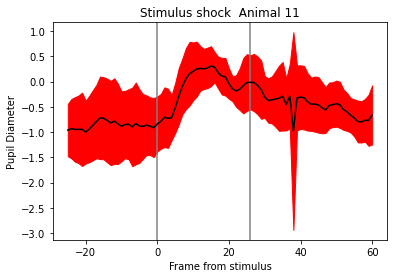

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7486     7098       7752    707        961   15354       15597
1     8030     8512       8239   1153       1360   15769       15950
2     9105     9367       8782   1827       1625   16179       16361
3     9981     9656      10232   2366       2148   16558       16729
4    10732    10955      10466   2599       2904   17014       17319
5    11526    11197      11787   3132       3335   17677       17485
6    12311    12093      12505   3910       3635   17854       18025
7    13148    13361      12791   4215       4510   18279       18538
8    13688    13973      14167   5018       4759   18838       19005
9    14796    14567      14339   5231       5469   19300       19610


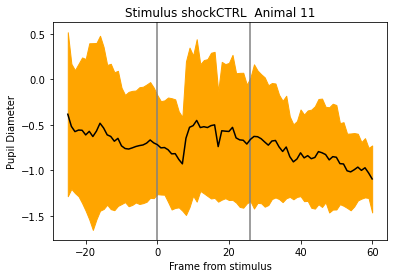

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7486     7098       7752    707        961   15354       15597
1     8030     8512       8239   1153       1360   15769       15950
2     9105     9367       8782   1827       1625   16179       16361
3     9981     9656      10232   2366       2148   16558       16729
4    10732    10955      10466   2599       2904   17014       17319
5    11526    11197      11787   3132       3335   17677       17485
6    12311    12093      12505   3910       3635   17854       18025
7    13148    13361      12791   4215       4510   18279       18538
8    13688    13973      14167   5018       4759   18838       19005
9    14796    14567      14339   5231       5469   19300       19610


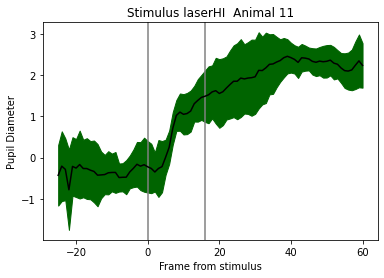

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7486     7098       7752    707        961   15354       15597
1     8030     8512       8239   1153       1360   15769       15950
2     9105     9367       8782   1827       1625   16179       16361
3     9981     9656      10232   2366       2148   16558       16729
4    10732    10955      10466   2599       2904   17014       17319
5    11526    11197      11787   3132       3335   17677       17485
6    12311    12093      12505   3910       3635   17854       18025
7    13148    13361      12791   4215       4510   18279       18538
8    13688    13973      14167   5018       4759   18838       19005
9    14796    14567      14339   5231       5469   19300       19610


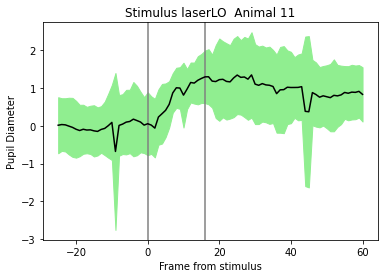

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7486     7098       7752    707        961   15354       15597
1     8030     8512       8239   1153       1360   15769       15950
2     9105     9367       8782   1827       1625   16179       16361
3     9981     9656      10232   2366       2148   16558       16729
4    10732    10955      10466   2599       2904   17014       17319
5    11526    11197      11787   3132       3335   17677       17485
6    12311    12093      12505   3910       3635   17854       18025
7    13148    13361      12791   4215       4510   18279       18538
8    13688    13973      14167   5018       4759   18838       19005
9    14796    14567      14339   5231       5469   19300       19610


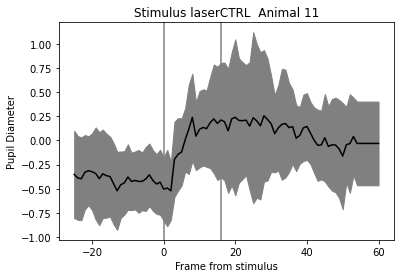

In [4]:
import matplotlib.pyplot as plt
colors = {'baseline':'dodgerblue','laserHI': 'darkgreen', 'laserLO': 'lightgreen', 'laserCTRL': 'gray','shock':'red', 'shockCTRL': 'orange',
         'squeak' : 'purple', 'squeakCTRL': 'pink'}
from sklearn import preprocessing
def pupil_averaged_trials(batch,animall,stim):
    pupildata = pd.read_csv("Batch" + str(batch) + "/" + "animal_" + str(batch) + str(animall) + "_pupilData.csv", index_col = 0)
    from sklearn.preprocessing import StandardScaler
    scaled = pd.DataFrame(StandardScaler().fit_transform(pupildata), columns = pupildata.columns, index = pupildata.index)
    scaled = scaled["pupilDiameter"]
    for ind in scaled.index:
        if(ind in scaled[scaled.isna().isin([True])].index):
            if(scaled.iat[ind-1] != np.nan):
                   scaled.iat[ind] = scaled.iat[ind-1]
            elif(scaled.iat[ind+1] != np.nan):
                   scaled.iat[ind] = scaled.iat[ind+1]
            elif(scaled.iat[ind-2] != np.nan):
                   scaled.iat[ind] = scaled.iat[ind-2]
            elif(scaled.iat[ind+2] != np.nan):
                   scaled.iat[ind] = scaled.iat[ind+2]
    
    
    fps = 15.49/3
    #stimulus times are from behavioral data, but facial expressions have 3 x fps of pupil for batch 2
    list_start = pd.read_csv("Batch" + str(batch) + "/" +'list_start'+ str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/" +'list_end'+ str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = list_start.dropna(axis = 1)
    list_end = list_end.dropna(axis = 1)
    print(list_start)
    #max_expressions = pd.read_csv("Batch" + str(batch) + "/Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    
    pup_distance = pd.DataFrame(index = range(-int(fps*5),int(fps*12)), columns = range(0,10))    
    if(stim in list_start.columns):
        y = stim
        for z in list_start.index:
            start = int(list_start.at[z,y]) - int(fps*5)
            stop = int(list_start.at[z,y]) + int(fps*12)
            comparison = []
            for frame in range(start,stop):
                comparison.append(scaled.iat[frame])
                pup_distance.at[frame-int(list_start.at[z,y]),z] = scaled.iat[frame]
            #plt.axvline(list_start.at[z,y], c = 'gray')
            #plt.axvline(list_end.at[z,y],c = 'gray')
            #plt.plot(range(start,stop), comparison)
            #plt.title("Stimulus " + str(y)+ "_" + str(z) + "  Animal " + batch + str(animall))
            #plt.plot(max_expressions.at[z,y], comparison[int(max_expressions.at[z,y]-start)], 'r*')
            #plt.ylim(4,14)
            #plt.xlabel('Frame number')
            #plt.ylabel("Distance from baseline")
            #plt.show()
        
        #Plotting only certain trials (later or earlier)
        #mah_distance = mah_distance.iloc[:,:5]
        
        std = []
        for frame in range(-int(fps*5),int(fps*12)):
            listt = pup_distance.loc[frame,:].tolist()
            #listt = [x for x in listt if x >= 0]
            std.append(np.std(np.array(listt)))
        diff = []
        summ = []
        avg = pup_distance.mean(axis = 1).tolist()
        for frame in range(0,int(fps*12)+int(fps*5)):
            diff.append(avg[frame]-std[frame])
            summ.append(avg[frame]+std[frame])

        plt.title("Stimulus " + str(y) + "  Animal " + batch + animall)
        plt.xlabel('Frame from stimulus')
        plt.ylabel("Pupil Diameter")
        plt.axvline(0, c = 'gray')
        plt.axvline(list_end.at[0,y]-list_start.at[0,y],c = 'gray')
        plt.plot(range(-int(fps*5),int(fps*12)), avg, color = "black")
        plt.fill_between(range(-int(fps*5),int(fps*12)), diff, summ, color = colors.get(y))
        plt.savefig('presentation_pupil_animal11_' + str(stim) + '.eps', format='eps')
        plt.show()
        
        return pup_distance

for (batch,animall) in [("1","1")]:#,("1","2"),("2","1"),("2","2"),("2","3"),("2","4")]:#,("1","2"),("2","1"),("2","2"),("2","3"),("2","4")]:
    for stim in ["shock","shockCTRL","laserHI","laserLO","laserCTRL"]:
        pupil_averaged_trials(batch,animall,stim)

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7486     7098       7752    707        961   15354       15597
1     8030     8512       8239   1153       1360   15769       15950
2     9105     9367       8782   1827       1625   16179       16361
3     9981     9656      10232   2366       2148   16558       16729
4    10732    10955      10466   2599       2904   17014       17319
5    11526    11197      11787   3132       3335   17677       17485
6    12311    12093      12505   3910       3635   17854       18025
7    13148    13361      12791   4215       4510   18279       18538
8    13688    13973      14167   5018       4759   18838       19005
9    14796    14567      14339   5231       5469   19300       19610


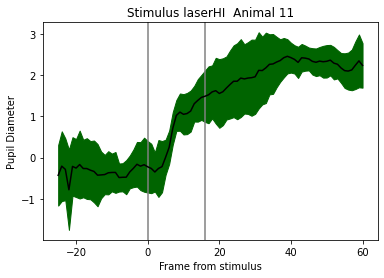

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7912     8182       7626   1068        896   16620       16449
1     8803     8385       8631   1601       1383   17154       16926
2     9605     9087       9286   1949       1783   17564       17377
3     9858    10473      10179   2472       2167   18025       17859
4    10795    11345      11047   6009       2908   18248       18543
5    12163    11884      11624   3188       3504   19046       18761
6    12944    12521      12733   3980       3675   19590       19346
7    13872    13603      13169   4514       4214   19989       19797
8    14676    14365      14110   4939       4716   20451       20254
9    15135    15491      15767   5183       5359   20881       20632


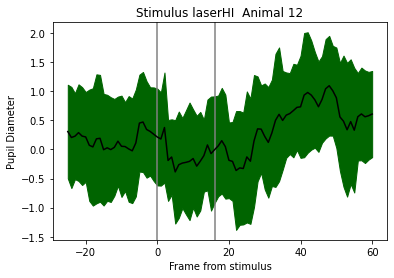

            0         1
-25 -0.431402  0.307273
-24 -0.208873  0.205275
-23 -0.285872  0.227695
-22 -0.782515  0.288987
-21 -0.214748  0.229248
..        ...       ...
 56  2.104362  0.562366
 57  2.132932  0.610274
 58  2.246420  0.561585
 59  2.352426  0.579330
 60  2.242207  0.608523

[86 rows x 2 columns]


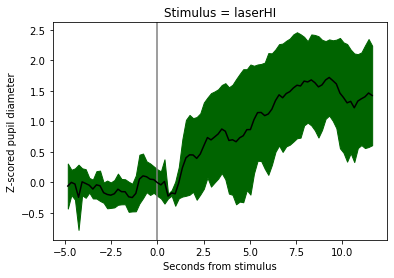

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7486     7098       7752    707        961   15354       15597
1     8030     8512       8239   1153       1360   15769       15950
2     9105     9367       8782   1827       1625   16179       16361
3     9981     9656      10232   2366       2148   16558       16729
4    10732    10955      10466   2599       2904   17014       17319
5    11526    11197      11787   3132       3335   17677       17485
6    12311    12093      12505   3910       3635   17854       18025
7    13148    13361      12791   4215       4510   18279       18538
8    13688    13973      14167   5018       4759   18838       19005
9    14796    14567      14339   5231       5469   19300       19610


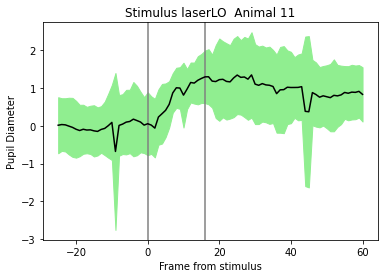

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7912     8182       7626   1068        896   16620       16449
1     8803     8385       8631   1601       1383   17154       16926
2     9605     9087       9286   1949       1783   17564       17377
3     9858    10473      10179   2472       2167   18025       17859
4    10795    11345      11047   6009       2908   18248       18543
5    12163    11884      11624   3188       3504   19046       18761
6    12944    12521      12733   3980       3675   19590       19346
7    13872    13603      13169   4514       4214   19989       19797
8    14676    14365      14110   4939       4716   20451       20254
9    15135    15491      15767   5183       5359   20881       20632


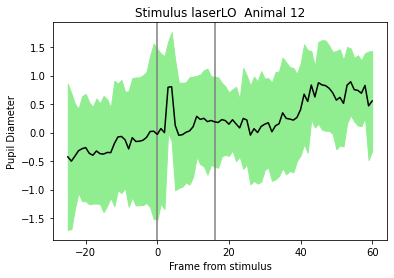

            0         1
-25  0.011767 -0.425603
-24  0.029921 -0.501832
-23  0.021718 -0.412128
-22 -0.011682 -0.318175
-21 -0.044723 -0.282932
..        ...       ...
 56  0.855911  0.741216
 57  0.885527  0.690800
 58  0.879160  0.827598
 59  0.905598  0.469614
 60  0.826022  0.554668

[86 rows x 2 columns]


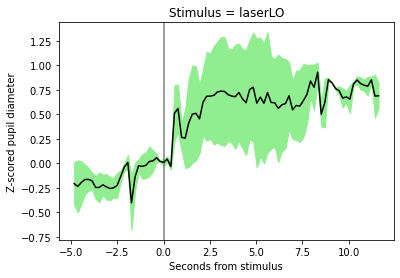

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7486     7098       7752    707        961   15354       15597
1     8030     8512       8239   1153       1360   15769       15950
2     9105     9367       8782   1827       1625   16179       16361
3     9981     9656      10232   2366       2148   16558       16729
4    10732    10955      10466   2599       2904   17014       17319
5    11526    11197      11787   3132       3335   17677       17485
6    12311    12093      12505   3910       3635   17854       18025
7    13148    13361      12791   4215       4510   18279       18538
8    13688    13973      14167   5018       4759   18838       19005
9    14796    14567      14339   5231       5469   19300       19610


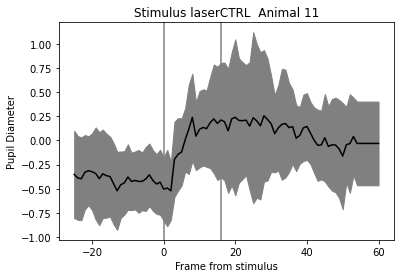

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7912     8182       7626   1068        896   16620       16449
1     8803     8385       8631   1601       1383   17154       16926
2     9605     9087       9286   1949       1783   17564       17377
3     9858    10473      10179   2472       2167   18025       17859
4    10795    11345      11047   6009       2908   18248       18543
5    12163    11884      11624   3188       3504   19046       18761
6    12944    12521      12733   3980       3675   19590       19346
7    13872    13603      13169   4514       4214   19989       19797
8    14676    14365      14110   4939       4716   20451       20254
9    15135    15491      15767   5183       5359   20881       20632


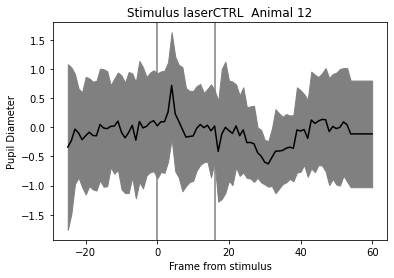

            0         1
-25 -0.352068 -0.337926
-24 -0.388740 -0.226942
-23 -0.397808 -0.029335
-22 -0.329056 -0.096161
-21 -0.314170 -0.211616
..        ...       ...
 56 -0.031915 -0.112092
 57 -0.031915 -0.112092
 58 -0.031915 -0.112092
 59 -0.031915 -0.112092
 60 -0.031915 -0.112092

[86 rows x 2 columns]


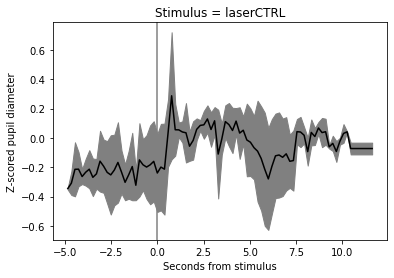

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7486     7098       7752    707        961   15354       15597
1     8030     8512       8239   1153       1360   15769       15950
2     9105     9367       8782   1827       1625   16179       16361
3     9981     9656      10232   2366       2148   16558       16729
4    10732    10955      10466   2599       2904   17014       17319
5    11526    11197      11787   3132       3335   17677       17485
6    12311    12093      12505   3910       3635   17854       18025
7    13148    13361      12791   4215       4510   18279       18538
8    13688    13973      14167   5018       4759   18838       19005
9    14796    14567      14339   5231       5469   19300       19610


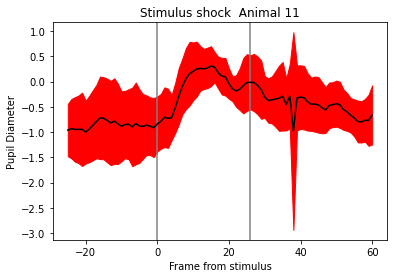

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7912     8182       7626   1068        896   16620       16449
1     8803     8385       8631   1601       1383   17154       16926
2     9605     9087       9286   1949       1783   17564       17377
3     9858    10473      10179   2472       2167   18025       17859
4    10795    11345      11047   6009       2908   18248       18543
5    12163    11884      11624   3188       3504   19046       18761
6    12944    12521      12733   3980       3675   19590       19346
7    13872    13603      13169   4514       4214   19989       19797
8    14676    14365      14110   4939       4716   20451       20254
9    15135    15491      15767   5183       5359   20881       20632


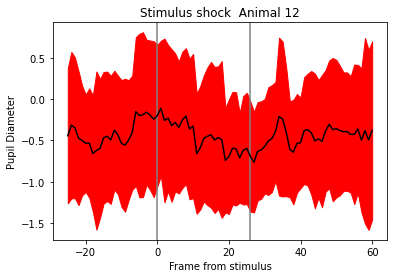

            0         1
-25 -0.962015 -0.443702
-24 -0.933446 -0.314748
-23 -0.948226 -0.346962
-22 -0.947346 -0.472386
-21 -0.946190 -0.500467
..        ...       ...
 56 -0.791658 -0.361042
 57 -0.798820 -0.496742
 58 -0.768039 -0.382575
 59 -0.768386 -0.493346
 60 -0.661664 -0.379507

[86 rows x 2 columns]


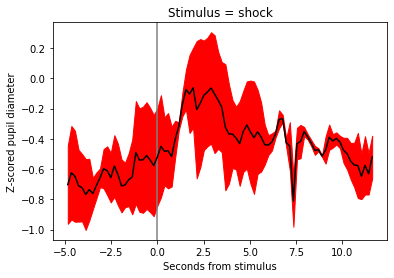

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7486     7098       7752    707        961   15354       15597
1     8030     8512       8239   1153       1360   15769       15950
2     9105     9367       8782   1827       1625   16179       16361
3     9981     9656      10232   2366       2148   16558       16729
4    10732    10955      10466   2599       2904   17014       17319
5    11526    11197      11787   3132       3335   17677       17485
6    12311    12093      12505   3910       3635   17854       18025
7    13148    13361      12791   4215       4510   18279       18538
8    13688    13973      14167   5018       4759   18838       19005
9    14796    14567      14339   5231       5469   19300       19610


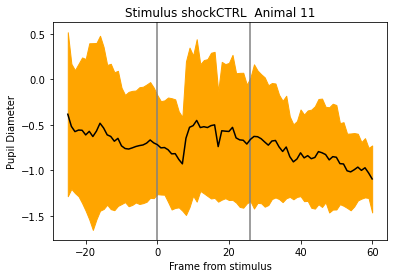

   laserHI  laserLO  laserCTRL  shock  shockCTRL  squeak  squeakCTRL
0     7912     8182       7626   1068        896   16620       16449
1     8803     8385       8631   1601       1383   17154       16926
2     9605     9087       9286   1949       1783   17564       17377
3     9858    10473      10179   2472       2167   18025       17859
4    10795    11345      11047   6009       2908   18248       18543
5    12163    11884      11624   3188       3504   19046       18761
6    12944    12521      12733   3980       3675   19590       19346
7    13872    13603      13169   4514       4214   19989       19797
8    14676    14365      14110   4939       4716   20451       20254
9    15135    15491      15767   5183       5359   20881       20632


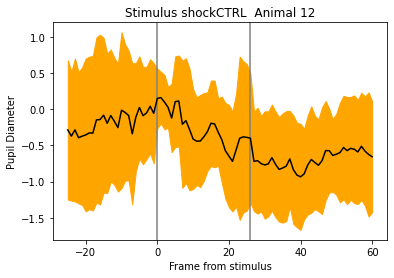

            0         1
-25 -0.382088 -0.286429
-24 -0.515320 -0.372165
-23 -0.573222 -0.286272
-22 -0.556146 -0.393783
-21 -0.558511 -0.373036
..        ...       ...
 56 -0.963383 -0.590726
 57 -0.999131 -0.512404
 58 -0.970708 -0.579577
 59 -1.027412 -0.624829
 60 -1.093426 -0.656680

[86 rows x 2 columns]


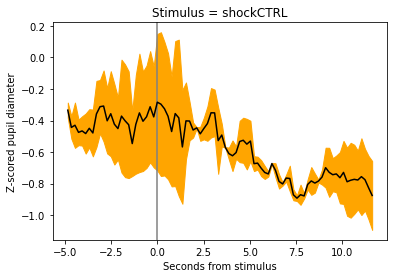

In [9]:
# Only batch 1 - for presentation
# averaged pupil diameter across all animals and trials, with standard deviation for animals not trials
for stim in ["laserHI","laserLO","laserCTRL","shock","shockCTRL"]:
    fps = 15.49/3
    mah1 = pupil_averaged_trials("1", "1",stim)
    mah2 = pupil_averaged_trials("1", "2",stim)
    #mah21 = pupil_averaged_trials("2", "1",stim)
    #mah22 = pupil_averaged_trials("2", "2",stim)
    #mah23 = pupil_averaged_trials("2", "3",stim)
    #mah24 = pupil_averaged_trials("2", "4",stim)
    mah_avg1 = pd.DataFrame(mah1.mean(axis = 1))
    mah_avg2 = pd.DataFrame(mah2.mean(axis = 1))
    #mah_avg21 = pd.DataFrame(mah21.mean(axis = 1))
    #mah_avg22 = pd.DataFrame(mah22.mean(axis = 1))
    #mah_avg23 = pd.DataFrame(mah23.mean(axis = 1))
    mah = pd.concat([mah_avg1,mah_avg2], axis = 1, ignore_index = True)#,mah_avg21,mah_avg22,mah_avg23], axis = 1, ignore_index = True)
    #if(stim not in ["laserHI","laserLO","laserCTRL"]):
    #    mah_avg24 = pd.DataFrame(mah24.mean(axis = 1))
    #    mah = pd.concat([mah,mah_avg24], axis = 1, ignore_index = True)
    print(mah) 
            
    std = []
    for frame in range(-int(fps*5),int(fps*12)):
        listt = mah.loc[frame,:].tolist()
        std.append(np.std(np.array(listt)))
    diff = []
    summ = []
    avg = mah.mean(axis = 1).tolist()
    for frame in range(0,int(fps*12)+int(fps*5)):
        diff.append(avg[frame]-std[frame])
        summ.append(avg[frame]+std[frame])

    plt.title("Stimulus = " + str(stim))
    plt.xlabel('Seconds from stimulus')
    plt.ylabel("Z-scored pupil diameter")
    plt.axvline(0, c = 'gray')
    #if(stim in ["laserHI","laserLO","laserCTRL"]):
    #    plt.axvline(int(3.1),c = 'gray')
    #else:
    #    plt.axvline(int(5),c = 'gray')
    listtt = list(range(-25,61))
    listtt = [x/fps for x in listtt]
    plt.plot(listtt, avg, color = "black")
    plt.fill_between(listtt, diff, summ, color = colors.get(stim))
    plt.savefig('presentation_batch1_pupil' + str(stim) + '.eps', format='eps')
    plt.show()
        